## Observations and Insights 

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#print(mouse_metadata.columns)
#print(study_results.columns)

# Combine the data into a single dataset

combinded_df = mouse_metadata.merge(study_results, how='left', on='Mouse ID', sort=False)

# Display the data table for preview
combined_mouse_df = combinded_df.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume'})
combined_mouse_df.head(3)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1


In [41]:
# Checking the number of mice.
mouse_count = final_mouse_df['Mouse ID'].count()
mouse_count

1893

In [42]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = combined_mouse_df[combined_mouse_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [44]:
# Optional: Get all the data for the duplicate mouse ID. all_duplicate_rows = combined_df[combined_df.duplicated(['Mouse ID',])]
all_duplicate_rows = combined_mouse_df[combined_mouse_df.duplicated(['Mouse ID',])]
all_duplicate_rows


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [46]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_mouse_df.drop_duplicates("Mouse ID")
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [47]:
# Checking the number of mice in the clean DataFrame.
mouse_count = clean_df['Mouse ID'].count()
mouse_count

249

## Summary Statistics

In [75]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#Group 
reg_grouped = combined_mouse_df.groupby(["Drug Regimen"])
reg_grouped

mean = reg_grouped["Tumor Volume"].mean()
median = reg_grouped["Tumor Volume"].median()
variance = reg_grouped["Tumor Volume"].var()
std = reg_grouped["Tumor Volume"].std()
sem = reg_grouped["Tumor Volume"].sem()

#DF
_stats = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": std, "SEM": sem})
_stats


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [78]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
reg_group = combined_mouse_df.groupby(["Drug Regimen"])
reg_group

# Using the aggregation method, produce the same summary statistics in a single line
reg_mean = reg_group["Tumor Volume"].mean()
reg_median = reg_group["Tumor Volume"].median()
reg_variance = reg_group["Tumor Volume"].var()
reg_std = reg_group["Tumor Volume"].std()
reg_sem = reg_group["Tumor Volume"].sem()

summary_stats = pd.DataFrame({"Mean": reg_mean, "Median":reg_median, "Variance":reg_variance, "Standard Deviation": reg_std, "SEM": reg_sem})
summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.


In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



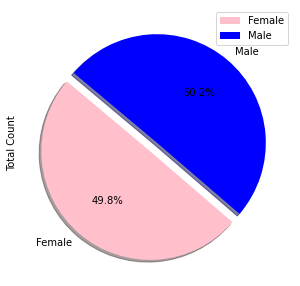

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = combined_mouse_df.groupby(["Mouse ID","Sex"])
gender_group 

gender_df = pd.DataFrame(gender_group.size())

#Total Count by gender 
gender_df = pd.DataFrame(gender_df.groupby(["Sex"]).count())
gender_df.columns = ["Total Count"]

#Create and Format
gender_df["Percentage of Sex"] = (100*(gender_df["Total Count"]/gender_df["Total Count"].sum()))

gender_df["Percentage of Sex"] = gender_df["Percentage of Sex"]

#Creating Pie Chart
colors = ['pink', 'blue']
explode = (0.1, 0)
plot = gender_df.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")


(-1.1879383453817904,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

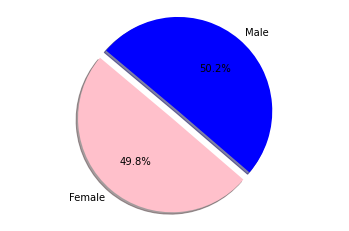

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female","Male"]
sizes = [49.799197,50.200803]
colors = ['pink', 'blue']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal") 

## Quartiles, Outliers and Boxplots

In [83]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
best_reg = final_mouse_df[final_mouse_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_reg = best_reg.sort_values(["Timepoint"], ascending=True)
best_reg

# Start by getting the last (greatest) timepoint for each mouse

best_regimes_data = best_reg[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume"]]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
best_regimes_data 

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

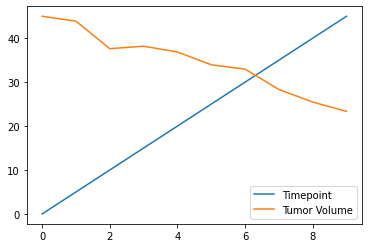

In [80]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
vol_vs_time = combined_mouse_df[final_mouse_df["Mouse ID"].isin(["s185"])]
vol_vs_time

#DF
vol_vs_time_data = time_vs_tumor[["Mouse ID", "Timepoint", "Tumor Volume"]]
vol_vs_time_data

#Reset Index 
line_plot_df = vol_vs_time_data.reset_index()
line_plot_df

#DF After Reset
line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume"]]
line_plot_final

#Plot
lines = line_plot_final.plot.line()

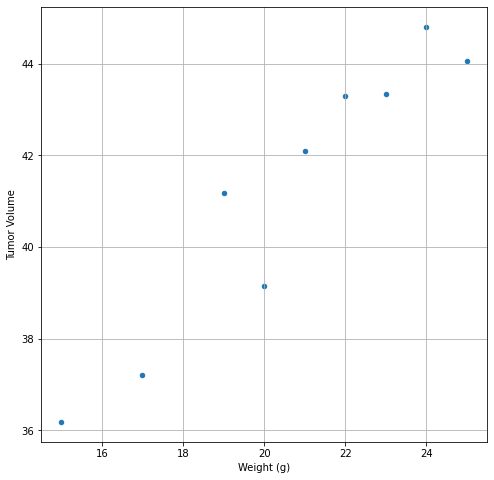

In [94]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#Variable Capomulin
capomulin_scatter = combined_mouse_df[combined_mouse_df["Drug Regimen"].isin(["Capomulin"])]

#1st DF
capomulin_scatter_df = best_reg[["Mouse ID","Weight (g)", "Tumor Volume"]]
#Sorting the capomulin variable by Weight (g) 
capomulin_sorted = capomulin_scatter.sort_values(["Weight (g)"], ascending=True)

#Reset Index
capomulin_scatter_plot = capomulin_scatter.reset_index()

#Mean from the a groupby of Weight and Tumor Volume
capomulin_grouped_weight = capomulin_scatter_plot.groupby("Weight (g)")["Tumor Volume"].mean()

#Create DF and reset
capo_group_plot = pd.DataFrame(capomulin_grouped_weight).reset_index()

#Plotting
capomulin_scatter = capo_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume', grid = True, figsize= (8,8))


## Correlation and Regression

Text(0.5, 1.0, 'Weight Vs. Avg Tumor Vol')

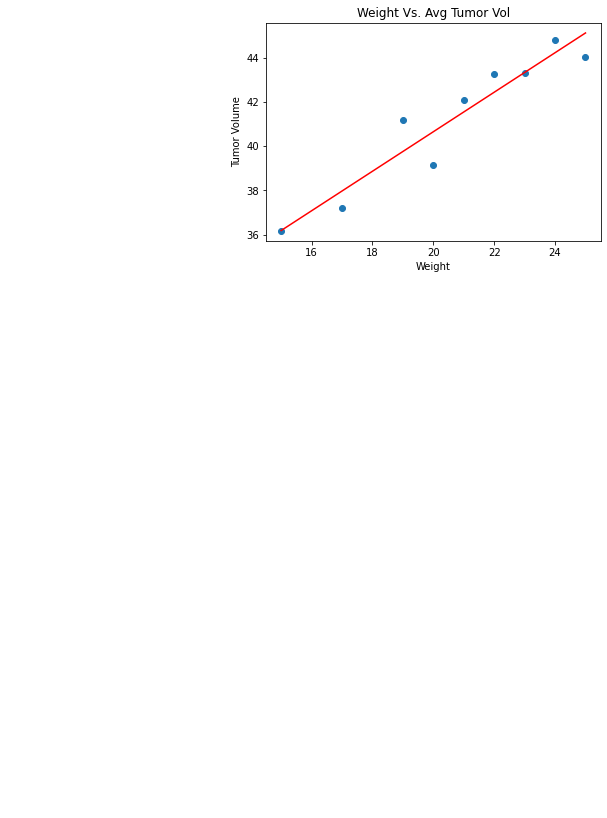

In [95]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#X & Y values
x_values = capo_group_plot["Weight (g)"]
y_values = capo_group_plot["Tumor Volume"]

#Linear reg.
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

#find reg. by x values times the slope and intercept
regress_values = x_values * slope + intercept

#Line equation
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

#PLot the Scatter
plt.scatter(x_values, y_values)

#PLot the line
plt.plot(x_values,regress_values,"r-")

#Red line
plt.annotate(line_eq,(6,10),fontsize=10,color="red")

#Titles and Labels
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight Vs. Avg Tumor Vol")